In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data = pd.read_csv("Companydata.csv")

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Text(0.5, 0, 'sales')

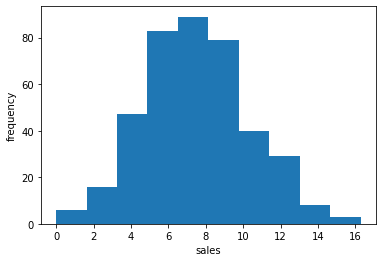

In [4]:
plot = plt.hist(data['Sales'])
plt.ylabel('frequency')
plt.xlabel('sales')

In [5]:
#so now we will first convert sales in categorical variable with "yes" = sales> 8 and "no" = <8.

In [6]:
category = pd.cut(data.Sales,bins=[0,8,20],labels=['0','1'])

In [7]:
data.insert(0,'sales',category)

In [8]:
data

,sales,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,0,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
company = data.drop('Sales',axis=1)

In [10]:
company

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [11]:
label_encoder = preprocessing.LabelEncoder()
company['US']= label_encoder.fit_transform(company['US']) 
company['Urban']= label_encoder.fit_transform(company['Urban']) 
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
 

In [12]:
company

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [13]:
company.dtypes

sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int32
Age               int64
Education         int64
Urban             int32
US                int32
dtype: object

In [14]:
company['sales']=pd.to_numeric(company['sales'],errors='coerce')

In [15]:
company.dtypes

sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [16]:
company

,sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,0.0,139,23,3,37,120,2,55,11,0,1
397,0.0,162,26,12,368,159,2,40,18,1,1
398,0.0,100,79,7,284,95,0,50,12,1,1


In [26]:
company.isnull().sum()

sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [27]:
company['sales'] = company['sales'].fillna(0)

In [28]:
x = company.iloc[:, 1:11].values
y =  company.iloc[:,0].values

In [29]:
x

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [30]:
y

array([1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0.

In [31]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [32]:
#model training
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

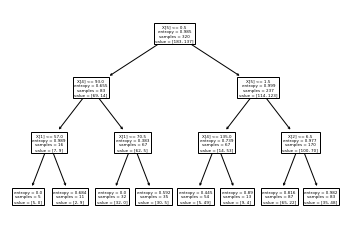

In [33]:
#PLot the decision tree
tree.plot_tree(model);

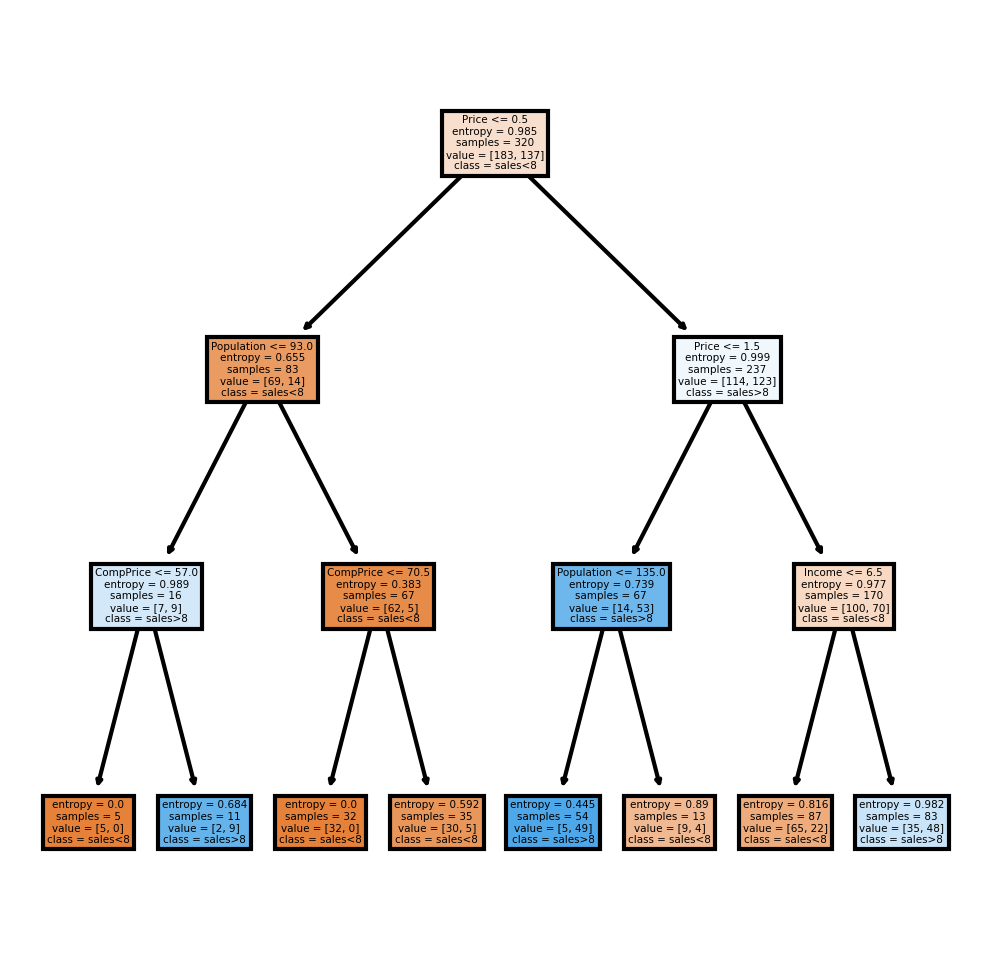

In [34]:
fn=['sales','CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=["sales<8","sales>8"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0.0    49
1.0    31
dtype: int64

In [36]:
preds 

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [37]:
# Accuracy 
np.mean(preds==y_test)

0.7

In [ ]:
#so based on the tree we could identify the segment giving high sales (ie >8(in thousands))